## ***Failed*** ***try***

We tried using EasyOCR for license plate detection, but it didn't work. EasyOCR failed to recognize any characters on the plate, even after applying image processing. The results were completely incorrect. but YOLO worked perfect.

In [ ]:
## install and import libraries

In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.80 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 35.5/107.7 GB disk)


In [ ]:
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 39.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.9/422.9 kB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 969.6/969.6 kB 46.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.9/292.9 kB 19.4 MB/s eta 0:00:00


In [14]:
from google.colab import drive
import os
import cv2
import numpy as np
import easyocr
from ultralytics import YOLO
from google.colab.patches import cv2_imshow
import zipfile
import tempfile

In [ ]:
drive.mount("/content/drive")

Mounted at /content/drive



0: 640x480 1 کل ناحیه پلاک, 171.9ms
Speed: 8.3ms preprocess, 171.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


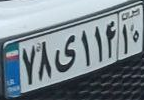

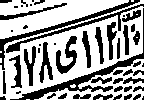

OCR Result for 1403-12-09 22.24.11.jpg: ٥[|ی٥

0: 640x384 1 کل ناحیه پلاک, 158.7ms
Speed: 4.8ms preprocess, 158.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)


OCR Result for 1403-12-09 22.24.31.jpg: ٣ ٢٧٥ ٤٢٥:

0: 448x640 1 کل ناحیه پلاک, 148.0ms
Speed: 4.5ms preprocess, 148.0ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


OCR Result for 1403-12-09 22.23.06.jpg: ,41٢٠خ لح

0: 448x640 2 کل ناحیه پلاکs, 151.7ms
Speed: 4.5ms preprocess, 151.7ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)


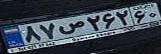

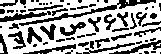

OCR Result for 1403-12-07 20.14.03.jpg: ٧٠٢٦٢جذ ,


No text detected in the plate for 1403-12-07 20.14.03.jpg.

0: 416x640 1 کل ناحیه پلاک, 220.9ms
Speed: 4.9ms preprocess, 220.9ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 640)


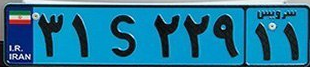

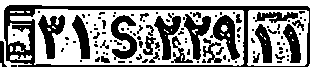

No text detected in the plate for 1403-12-07 20.14.16.jpg.

0: 640x480 1 کل ناحیه پلاک, 225.8ms
Speed: 4.8ms preprocess, 225.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


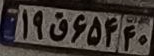

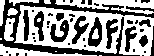

OCR Result for 1403-12-09 22.24.07.jpg: ٤٥٢ق5٥

0: 640x448 1 کل ناحیه پلاک, 170.7ms
Speed: 4.6ms preprocess, 170.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


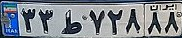

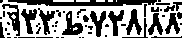

OCR Result for 1403-12-09 22.22.51.jpg: ٧٢٨٨؟٢٣٥؟

0: 640x480 1 کل ناحیه پلاک, 154.8ms
Speed: 5.8ms preprocess, 154.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


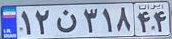

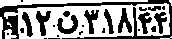

OCR Result for 1403-12-09 22.23.36.jpg: ٣،١٥١٤٣؛٦٢٠٥؟

0: 448x640 1 کل ناحیه پلاک, 142.2ms
Speed: 4.5ms preprocess, 142.2ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


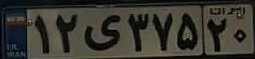

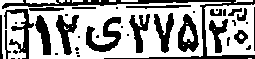

OCR Result for 1403-12-07 20.13.58.jpg: ٣٧٥ى

0: 640x448 3 کل ناحیه پلاکs, 142.0ms
Speed: 5.0ms preprocess, 142.0ms inference, 9.4ms postprocess per image at shape (1, 3, 640, 448)


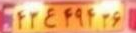

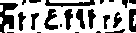

OCR Result for 1403-12-09 22.23.32.jpg: ٥ ٢٤ ٦٢٢٤٢٢


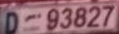

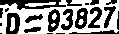

OCR Result for 1403-12-09 22.23.32.jpg: |=83827


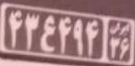

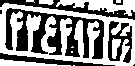

OCR Result for 1403-12-09 22.23.32.jpg: ٥


In [13]:
# plate recognition with YOLO
# character recognition with EASYOCR

reader = easyocr.Reader(['fa'])
model = YOLO("/content/drive/MyDrive/best_model_nano.pt")

zip_file_path = "/content/drive/MyDrive/car_test.zip"

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    temp_dir = tempfile.mkdtemp()
    zip_ref.extractall(temp_dir)

image_folder = temp_dir
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]
image_files = image_files[:10]

for image_file in image_files:
    image_path = os.path.join(image_folder, image_file)
    image = cv2.imread(image_path)

    results = model(image)

    if len(results[0].boxes) == 0:
        print(f"No plates detected in {image_file}.")
        continue

    boxes = results[0].boxes

    for box in boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        cropped_plate = image[y1:y2, x1:x2]

        if cropped_plate.size == 0:
            print(f"Skipping empty crop in {image_file}.")
            continue

        cv2_imshow(cropped_plate)

        gray_plate = cv2.cvtColor(cropped_plate, cv2.COLOR_BGR2GRAY)
        gray_plate = cv2.GaussianBlur(gray_plate, (3, 3), 0)
        gray_plate = cv2.equalizeHist(gray_plate)
        gray_plate = cv2.adaptiveThreshold(gray_plate, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, 5)

        kernel = np.ones((2, 2), np.uint8)
        gray_plate = cv2.morphologyEx(gray_plate, cv2.MORPH_CLOSE, kernel)

        cv2_imshow(gray_plate)

        result = reader.readtext(gray_plate, detail=0)

        if result:
            print(f"OCR Result for {image_file}: {' '.join(result)}")
        else:
            print(f"No text detected in the plate for {image_file}.")


In [ ]:
# ocr_reader = easyocr.Reader(['fa', 'en'])

# models = {
#     'nano': '/content/weights/yolo11n.pt',
# }

# image_folder = '/content/car_validation/validation/images/'

# for model_name, model_path in models.items():
#     print(f"\n🔃 Predicting with {model_name} model...")

#     model = YOLO(model_path)

#     image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]

#     print("Images to process:", image_files)

#     for image_file in image_files:
#         image_path = os.path.join(image_folder, image_file)

#         image = cv2.imread(image_path)

#         results = model(image)

#         results[0].plot()
#         if len(results[0].boxes) == 0:
#             print(f"No plates detected in {image_file}.")
#             continue

#         boxes = results[0].boxes

#         for box in boxes:
#             x, y, w, h = map(int, box.xywh[0])
#             cropped_plate = image[y:y+h, x:x+w]

#             cv2_imshow(cropped_plate)
#             cv2.waitKey(0)
#             cv2.destroyAllWindows()

#             result = ocr_reader.readtext(cropped_plate)

#             if result:
#                 print(f"OCR Result for {image_file}: ", result)
#             else:
#                 print(f"No text detected in the plate for {image_file}.")
